In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install qiskit 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 14.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import qiskit 
from qiskit import QuantumCircuit 
from qiskit import transpile 
from qiskit_aer import AerSimulator 
from qiskit.visualization import plot_histogram

In [5]:
def oracle(n, case): 
    qc=QuantumCircuit(n+1)
    if (case=="constant"): 
        val=np.random.randint(2) 
        if (val==1): 
            qc.x(n)
    else: 
        for i in range(n): 
            qc.cx(i, n)
    gate=qc.to_gate(label="Oracle")
    return gate 
    
        

In [6]:
def deutsch_josza(n, case): 
    qc=QuantumCircuit(n+1, n) 
    qc.x(n)
    qc.h(range(n+1))
    qc.append(oracle(n, case), range(n+1))
    qc.h(range(n))
    for i in range(n): 
        qc.measure(i, i)
    return qc 
    

In [7]:
qc=deutsch_josza(5, "constant") 
qc.draw()

┌───┐     ┌─────────┐┌───┐┌─┐            
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├────────────
     ├───┤     │         │├───┤└╥┘┌─┐         
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├─────────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐      
q_2: ┤ H ├─────┤2        ├┤ H ├─╫──╫─┤M├──────
     ├───┤     │  Oracle │├───┤ ║  ║ └╥┘┌─┐   
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├─────┤4        ├┤ H ├─╫──╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║  ║ └╥┘
q_5: ┤ X ├┤ H ├┤5        ├──────╫──╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║  ║ 
c: 5/═══════════════════════════╩══╩══╩══╩══╩═
                                0  1  2  3  4

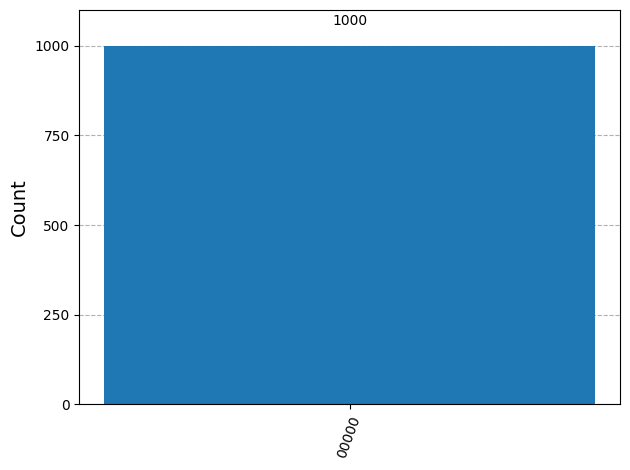

In [8]:
sim=AerSimulator() 
compiled=transpile(qc, sim) 
result=sim.run(compiled, shots=1000).result() 
counts=result.get_counts() 
plot_histogram(counts)

In [9]:
#  now the balanced case 
qc2=deutsch_josza(5, "balanced") 
qc2.draw()

┌───┐     ┌─────────┐┌───┐┌─┐            
q_0: ┤ H ├─────┤0        ├┤ H ├┤M├────────────
     ├───┤     │         │├───┤└╥┘┌─┐         
q_1: ┤ H ├─────┤1        ├┤ H ├─╫─┤M├─────────
     ├───┤     │         │├───┤ ║ └╥┘┌─┐      
q_2: ┤ H ├─────┤2        ├┤ H ├─╫──╫─┤M├──────
     ├───┤     │  Oracle │├───┤ ║  ║ └╥┘┌─┐   
q_3: ┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├───
     ├───┤     │         │├───┤ ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├─────┤4        ├┤ H ├─╫──╫──╫──╫─┤M├
     ├───┤┌───┐│         │└───┘ ║  ║  ║  ║ └╥┘
q_5: ┤ X ├┤ H ├┤5        ├──────╫──╫──╫──╫──╫─
     └───┘└───┘└─────────┘      ║  ║  ║  ║  ║ 
c: 5/═══════════════════════════╩══╩══╩══╩══╩═
                                0  1  2  3  4

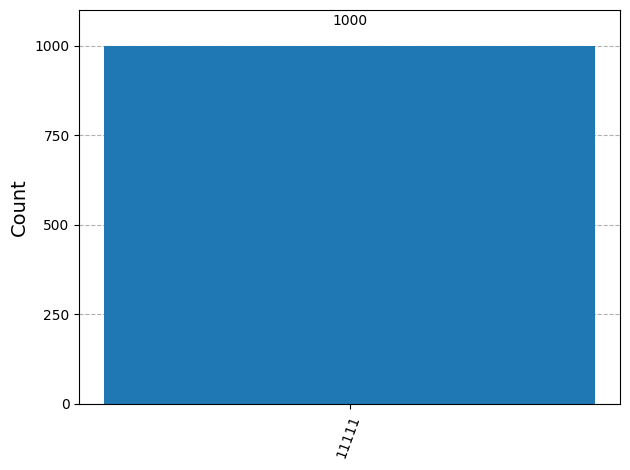

In [10]:
sim2=AerSimulator() 
compiled2=transpile(qc2, sim2) 
result2=sim2.run(compiled2, shots=1000).result() 
counts2=result2.get_counts() 
plot_histogram(counts2) 

# THIS DEPENDS ON IMPLEMENTATION OF THE ORACLE 